In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

mpl.rcParams['pdf.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'

In [ ]:
def stat_not(x):
    if x < 0.001:
        return '***'
    elif 0.001 < x < 0.05:
        return '*'
    else:
        return 'ns'

In [ ]:
# define a function to calculate the min and max of the SEM
def cal_sem(x:np.array):
    return np.mean(x) - stats.sem(x, nan_policy='omit'), np.mean(x) + stats.sem(x, nan_policy='omit')

In [ ]:
df1 = pd.read_excel('../data/img_quant.xlsm', header=None, sheet_name='new')

In [ ]:
rep = [[str(i)]*3 for i in range(len(df1)//3)]
rep_i=[]
for i in rep:
    rep_i+=i
df1['Rep'] = rep_i

In [ ]:
df1['Time'] = df1[0].str[:-2]
df1['Side'] = df1[0].map(lambda x: 'Ipsi' if 'i' in x else 'Contra')
df1.dropna(inplace=True)
df1['Percent'] = df1[1] * 100
df1['Sex'] = df1[2]

In [ ]:
# df1.to_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/Manu_tab/Supplementary_Tablen.xlsx')

In [ ]:
df1['Time'] = df1['Time'].astype('category').cat.reorder_categories(['D0', 'D1', 'D7', 'D14', 'D28'])

In [ ]:
df1_plot = df1.groupby(['Rep','Side','Time']).Percent.mean().dropna().T.to_frame()

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_50368/3212732071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1_plot = df1.groupby(['Rep','Side','Time']).Percent.mean().dropna().T.to_frame()


In [ ]:
df1_plot = df1_plot.reset_index()

In [ ]:
df1_ipsi = df1[df1['Side'] == 'Ipsi'].copy()
test = {}
for d in df1_ipsi['Time'].cat.categories[1:]:
    a = df1_ipsi[(df1_ipsi['Time'] == 'D0')]['Percent']
    b = df1_ipsi[(df1_ipsi['Time'] == d)]['Percent']
    # var = stats.levene(a, b)
    res = stats.mannwhitneyu(a, b, alternative='less')
    test[d] = res.pvalue
test

{'D1': np.float64(0.2394878485421187),
 'D7': np.float64(0.011273350852592371),
 'D14': np.float64(0.0075149513820943585),
 'D28': np.float64(0.0006753339723000332)}

In [ ]:
from statsmodels.stats.multitest import multipletests
test = pd.DataFrame(test, index=['p-value']).T
test['FDR'] = multipletests(test['p-value'], method='fdr_bh')[1]

In [ ]:
test_plt = test.FDR.to_list()

In [ ]:
df_treat = pd.read_excel('../data/IMG_treatment.xlsx', sheet_name='perc')

In [ ]:
df_treat['Conditions'] = df_treat['Conditions'].astype('category').cat.reorder_categories(['Control', 'Veh10', 'ABT263', 'Venetoclax', 'Veh2','Protac Bcl2', 'Protac Bcl-xl'])

In [ ]:
for d in ['ABT263', 'Venetoclax','Protac Bcl2', 'Protac Bcl-xl']:
    if d.startswith('P'):
        n = 'Veh2'
    else:
        n = 'Veh10'
    a = df_treat[(df_treat['Conditions'] == n)]['value']
    b = df_treat[(df_treat['Conditions'] == d)]['value']
    res = stats.ttest_ind(a, b, alternative='greater', permutations=10000)
    print(f'{d}: p-val {res[1]}; skewness {stats.skew(b)}')

ABT263: p-val 0.011904761904761904; skewness -0.47681571086034347
Venetoclax: p-val 0.004761904761904762; skewness -0.09431949691492085
Protac Bcl2: p-val 0.004761904761904762; skewness -0.42666507573725865
Protac Bcl-xl: p-val 0.004761904761904762; skewness 0.433646729515879


In [ ]:
df_treat = df_treat[df_treat.Conditions != 'Protac Bcl2'].copy()
df_treat.Conditions = df_treat.Conditions.cat.remove_unused_categories()

In [ ]:
cmap = {
    'Control': '#000000',
    'Veh2': '#f08080',
    'Veh10': '#a9a9a9',
    'ABT263': '#a9a9a9',
    'Venetoclax': '#a9a9a9',
    'Protac Bcl2': '#f08080',
    'Protac Bcl-xl': '#f08080'
    }

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_50368/555433506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conditions', y='value', data=df_treat,
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_50368/555433506.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Conditions', y='value', data=df_treat, ax=ax,
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_50368/555433506.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['NT','Veh10','AB','V','Veh2','P Bcl-xL'], fontsize=12, rotation=90)
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ip

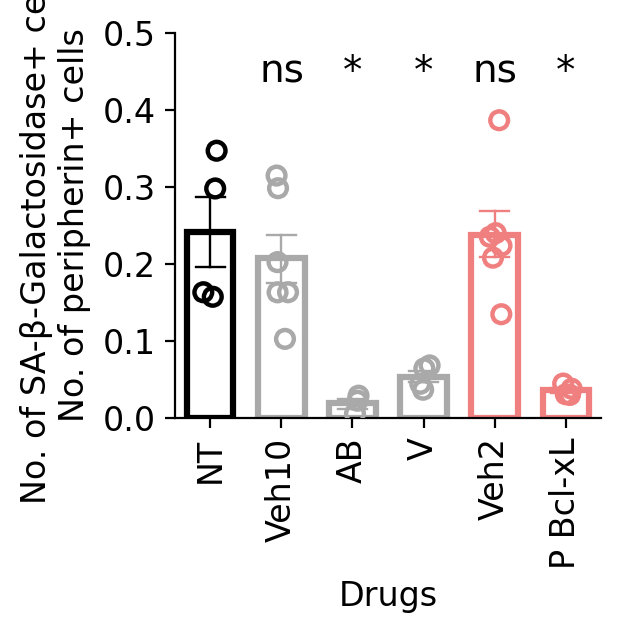

In [ ]:
fig, ax = plt.subplots(figsize=(2.75,2.5))
sns.barplot(x='Conditions', y='value', data=df_treat, 
            errorbar=("ci", 68), capsize=.4, ax=ax,
            err_kws={"linewidth": 0.85},
            fill=False,
            # color='k',
            width=0.65, palette=cmap)
sns.stripplot(x='Conditions', y='value', data=df_treat, ax=ax,
            #   color='k',
            # hue='Conditions',
            size=8, marker='$\circ$', palette=cmap)

ax.set_ylim(0,0.5)
for i in range(1,6):
    plt.text(i, 0.45, 'ns' if i in [1,4] else '*', ha='center', va='center', fontsize=14)
    # plt.text(i+3, 0.45, 'ns' if i == 1 else '*', ha='center', va='center', fontsize=14)

ax.set_xlabel('Drugs', fontsize=12)
ax.set_ylabel('No. of SA-β-Galactosidase+ cells/\nNo. of peripherin+ cells', fontsize=12)
ax.set_xticklabels(['NT','Veh10','AB','V','Veh2','P Bcl-xL'], fontsize=12, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/BHDrug_plots/img_treatment.pdf', bbox_inches='tight', dpi=300)